<a href="https://colab.research.google.com/github/Rishit2611/PROJECT/blob/main/Uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#reads the csv file and stores it in df
df= pd.read_csv("/content/drive/MyDrive/My Uber Drives - 2016.csv")

In [ ]:
#Shows top 5 rows
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
#checking for null values
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [ ]:
#checking for statistics
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
#count of unique values
df['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

In [ ]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [ ]:
df['PURPOSE*'].fillna("unknown",inplace=True)

In [ ]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', 'unknown', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [ ]:
df.isnull().sum()

START_DATE*    0
END_DATE*      1
CATEGORY*      1
START*         1
STOP*          1
MILES*         0
PURPOSE*       0
dtype: int64

In [ ]:
df[df['CATEGORY*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,unknown


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,unknown
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df['START_DATE*']=pd.to_datetime(df['START_DATE*'],errors='coerce')
df['END_DATE*']=pd.to_datetime(df['END_DATE*'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [ ]:
from datetime import datetime
from datetime import date

df['MONTH*']= pd.DatetimeIndex(df['START_DATE*']).month

In [ ]:
df['MONTH*'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1154 non-null   datetime64[ns]
 1   END_DATE*    1154 non-null   datetime64[ns]
 2   CATEGORY*    1154 non-null   object        
 3   START*       1154 non-null   object        
 4   STOP*        1154 non-null   object        
 5   MILES*       1154 non-null   float64       
 6   PURPOSE*     1154 non-null   object        
 7   MONTH*       1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 81.1+ KB


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of trips per category')

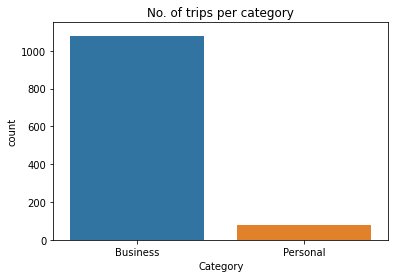

In [ ]:
sns.countplot(df['CATEGORY*'])
plt.xlabel("Category")
plt.ylim(0,1150)
plt.title("No. of trips per category")

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

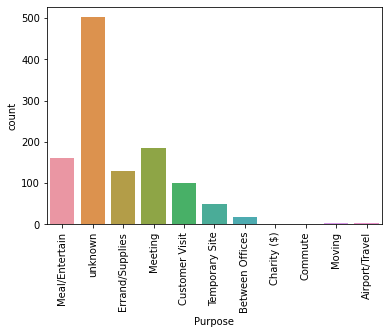

In [ ]:
sns.countplot(df['PURPOSE*'])
plt.xlabel("Purpose")
plt.xticks(rotation=90)

In [ ]:
df['HOUR']= pd.DatetimeIndex(df['START_DATE*']).hour
df['day-night']=pd.cut(df.HOUR,bins=[0,12,16,20,23],labels=['Morning','Afternoon','Evening','Night'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1154 non-null   datetime64[ns]
 1   END_DATE*    1154 non-null   datetime64[ns]
 2   CATEGORY*    1154 non-null   object        
 3   START*       1154 non-null   object        
 4   STOP*        1154 non-null   object        
 5   MILES*       1154 non-null   float64       
 6   PURPOSE*     1154 non-null   object        
 7   MONTH*       1154 non-null   object        
 8   HOUR         1154 non-null   int64         
 9   day-night    1135 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 123.8+ KB


In [ ]:
df[df['day-night'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTH*,HOUR,day-night
27,2016-01-15 00:41:00,2016-01-15 01:01:00,Business,Morrisville,Cary,8.0,Errand/Supplies,Jan,0,NaN
103,2016-02-14 00:50:00,2016-02-14 01:00:00,Personal,Jackson Heights,East Elmhurst,1.8,unknown,Feb,0,NaN
231,2016-03-17 00:33:00,2016-03-17 00:44:00,Personal,Downtown,The Drag,1.7,unknown,Mar,0,NaN
274,2016-03-27 00:31:00,2016-03-27 00:40:00,Business,Lake Reams,Lake Reams,2.1,Errand/Supplies,Mar,0,NaN
301,2016-04-06 00:19:00,2016-04-06 00:39:00,Business,Wayne Ridge,Whitebridge,8.0,Meal/Entertain,April,0,NaN
386,2016-05-28 00:15:00,2016-05-28 00:21:00,Business,Kilarney Woods,Whitebridge,4.7,Errand/Supplies,May,0,NaN
454,2016-06-18 00:29:00,2016-06-18 00:51:00,Business,Morrisville,Cary,8.7,unknown,Jun,0,NaN
489,2016-06-28 00:48:00,2016-06-28 01:05:00,Business,Morrisville,Cary,8.2,Customer Visit,Jun,0,NaN
500,2016-07-01 00:00:00,2016-07-01 00:25:00,Business,Durham,Cary,9.9,Meeting,Jul,0,NaN
507,2016-07-03 00:28:00,2016-07-03 00:38:00,Business,Cary,Morrisville,3.1,Errand/Supplies,Jul,0,NaN


In [ ]:
df['day-night'].fillna('Morning',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1154 non-null   datetime64[ns]
 1   END_DATE*    1154 non-null   datetime64[ns]
 2   CATEGORY*    1154 non-null   object        
 3   START*       1154 non-null   object        
 4   STOP*        1154 non-null   object        
 5   MILES*       1154 non-null   float64       
 6   PURPOSE*     1154 non-null   object        
 7   MONTH*       1154 non-null   object        
 8   HOUR         1154 non-null   int64         
 9   day-night    1154 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 123.8+ KB


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Time of day')

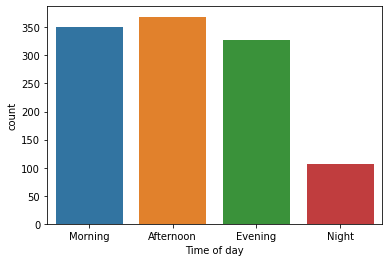

In [ ]:
sns.countplot(df['day-night'])
plt.xlabel("Time of day")

Text(0.5, 1.0, 'Miles covered per month')

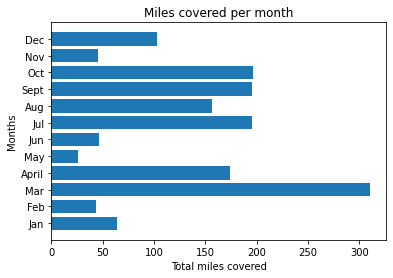

In [ ]:
plt.barh(df['MONTH*'],df['MILES*'])
plt.ylabel("Months")
plt.xlabel("Total miles covered")
plt.title("Miles covered per month")

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of rides per month')

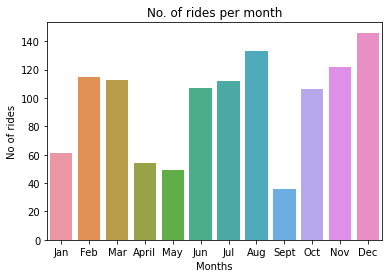

In [ ]:
sns.countplot(df['MONTH*'])
plt.xlabel("Months")
plt.ylabel("No of rides")
plt.title("No. of rides per month")

In [ ]:
df['Day']= pd.DatetimeIndex(df['START_DATE*']).weekday

In [ ]:
df['Day'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

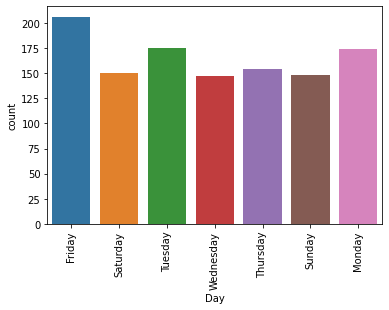

In [ ]:
sns.countplot(df['Day'])
plt.xticks(rotation=90)

Text(0.5, 1.0, "'Category' Pie-chart")

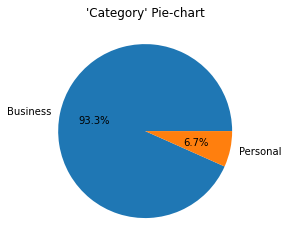

In [ ]:
g= df['CATEGORY*'].value_counts()
label= list(g.index)
val= list(g.values)
plt.pie(val,labels= label, autopct="%1.1f%%")
plt.title("'Category' Pie-chart")

Text(0, 0.5, 'No. of bookings')

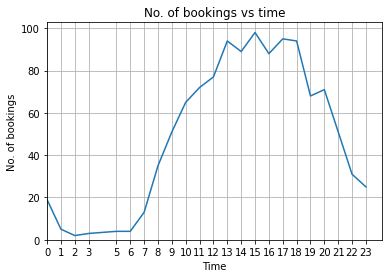

In [ ]:
x= df['HOUR'].value_counts().sort_index()
h=list(x.index)
hc=list(x.values)
plt.plot(h,hc)
plt.xticks(h)
plt.xlim(0)
plt.ylim(0)
plt.grid()
plt.title("No. of bookings vs time")
plt.xlabel("Time")
plt.ylabel("No. of bookings")
